# Verification frequency calculation

This code shows how we can compute the minimum horizontal and vertical verification frequency in order to achieve a certain level of guarantee computed in number of nines (e.g., 99.9999999%)


We need 14 horizontal verifications to have 99.900000000000% guarantee
We need 27 horizontal verifications to have 99.999900000000% guarantee
We need 40 horizontal verifications to have 99.999999900000% guarantee
For Cheat Ratio : 5
We need 13.5% vertical verifications to have 99.900000000000% guarantee
We need 27.0% vertical verifications to have 99.999900000000% guarantee
We need 40.5% vertical verifications to have 99.999999900000% guarantee


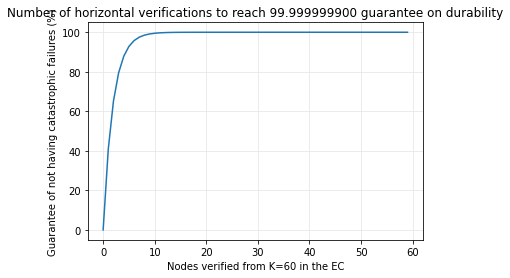

<Figure size 432x288 with 0 Axes>

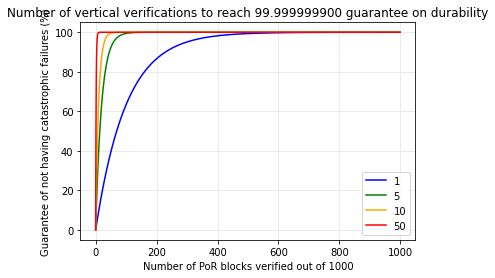

In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

#@markdown Durability guarantee (three 9s (99.9%) to nine 9s (99.9999999%))
Durability = 9 #@param {type:"slider", min:3, max:9, step:3}
#@markdown Erasure Coding parameter K
ECK = 60 #@param {type:"slider", min:1, max:100, step:1}
#@markdown Number of PoR blocks inside an EC block (See model below)
NbPoRinEC = 1000 #@param {type:"slider", min:100, max:10000, step:100}

CheatRatio = [1, 5, 10, 50]
GuaranteeDurability = {3:99.90, 6: 99.99990, 9: 99.99999990}
ExpectedGuarantee = GuaranteeDurability[Durability]

hx = []
HorizontalProb = []
HorizontalResults = {3:0, 6:0, 9:0}
for NbOfHVerif in range(ECK):
  prob = (1-(((ECK-1)/100)**NbOfHVerif))*100
  hx.append(NbOfHVerif)
  HorizontalProb.append(prob)
  if prob > GuaranteeDurability[3] and HorizontalResults[3] == 0:
    HorizontalResults[3] = NbOfHVerif
  if prob > GuaranteeDurability[6] and HorizontalResults[6] == 0:
    HorizontalResults[6] = NbOfHVerif
  if prob > GuaranteeDurability[9] and HorizontalResults[9] == 0:
    HorizontalResults[9] = NbOfHVerif
    
print("We need %d horizontal verifications to have %12.12f%% guarantee" % (HorizontalResults[3], GuaranteeDurability[3]))
print("We need %d horizontal verifications to have %12.12f%% guarantee" % (HorizontalResults[6], GuaranteeDurability[6]))
print("We need %d horizontal verifications to have %12.12f%% guarantee" % (HorizontalResults[9], GuaranteeDurability[9]))
 

c = 1
VerticalResults = {3:0, 6:0, 9:0}
vx = range(NbPoRinEC)
VerticalProb = []
for i in range(len(CheatRatio)):
  VProb = [0]
  for NbOfVVerif in range(1, NbPoRinEC):
    prob = (1-((1-(CheatRatio[i]/100))**NbOfVVerif))*100
    VProb.append(prob)
    if i == c:
        if prob > GuaranteeDurability[3] and VerticalResults[3] == 0:
          VerticalResults[3] = NbOfVVerif*100/NbPoRinEC
          #print("Probability of detecting catastrophic failures with %d vertical verifications %12.12f%% (Over nine 9s)" % (NbOfVVerif, prob))
          #print("That is %2.1f%% of the PoR blocks need to be verified" % (NbOfVVerif*100/NbPoRinEC))
        if prob > GuaranteeDurability[6] and VerticalResults[6] == 0:
          VerticalResults[6] = NbOfVVerif*100/NbPoRinEC
          #print("Probability of detecting catastrophic failures with %d vertical verifications %12.12f%% (Over nine 9s)" % (NbOfVVerif, prob))
          #print("That is %2.1f%% of the PoR blocks need to be verified" % (NbOfVVerif*100/NbPoRinEC))
        if prob > GuaranteeDurability[9] and VerticalResults[9] == 0:
          VerticalResults[9] = NbOfVVerif*100/NbPoRinEC
          #print("Probability of detecting catastrophic failures with %d vertical verifications %12.12f%% (Over nine 9s)" % (NbOfVVerif, prob))
          #print("That is %2.1f%% of the PoR blocks need to be verified" % (NbOfVVerif*100/NbPoRinEC))
  VerticalProb.append(VProb)

print("For Cheat Ratio : %d" % CheatRatio[c])
print("We need %2.1f%% vertical verifications to have %12.12f%% guarantee" % (VerticalResults[3], GuaranteeDurability[3]))
print("We need %2.1f%% vertical verifications to have %12.12f%% guarantee" % (VerticalResults[6], GuaranteeDurability[6]))
print("We need %2.1f%% vertical verifications to have %12.12f%% guarantee" % (VerticalResults[9], GuaranteeDurability[9]))


fig, ax = plt.subplots()
plt.grid(axis='x', color='0.9')
plt.grid(axis='y', color='0.9')
plt.title("Number of horizontal verifications to reach %9.9f guarantee on durability" % ExpectedGuarantee)
plt.xlabel("Nodes verified from K=%d in the EC" % ECK)
plt.ylabel("Guarantee of not having catastrophic failures (%)")
ax.plot(hx, HorizontalProb)
#plt.yscale('log')
plt.show()
plt.clf()

color = ["blue", "green", "orange", "red"]
fig, ax = plt.subplots()
plt.grid(axis='x', color='0.9')
plt.grid(axis='y', color='0.9')
plt.title("Number of vertical verifications to reach %9.9f guarantee on durability" % ExpectedGuarantee)
plt.xlabel("Number of PoR blocks verified out of %d" % NbPoRinEC)
plt.ylabel("Guarantee of not having catastrophic failures (%)")
for i in range(len(CheatRatio)):
  ax.plot(vx, VerticalProb[i], label = CheatRatio[i], color = color[i])
#plt.yscale('log')
ax.legend()
plt.show()



100 blocks
cheat ratio is 50%
only storing 50 blocks

Probability of you passing the verification for

1 block : 0.5
2 blocks : 0.5*0.5 = 0.25
3 blocks : 0.5*0.5*0.5

n blocks : 0.5^n

# PoR Analysis

## Friendly toy scenario

Feel free to play with these variables as much as you want in order to simulate any extreme scenario you find interesting to explore.


 *** Network Parameters *** 

The network has 15400 nodes
The average node capacity is 1200 GBs
The network has 1206000 files
The average file size in the network is 9765 MBs
The estimated mean time between failures of the network is 1 hours
Malicious nodes cheat the system by NOT storing 5% of the data they should store

 *** Codex Parameters *** 

The erasure coding parameter K is 60
The erasure coding parameter M is 40
The lazy repair parameter L is 20
The Proof of Retrievability number of sectors per block is 1000
The PoR agregation cost is 1 ms per PoR block
Durability in number of nines: 9

 *** Dataset and block structures *** 

There are 1206000 files of size 10000000 KB (9765.6 MB)
The total storage used in the network is 11231.8 TB and there is 6815.1 TB of available storage for a total of 18046.9 TB
There will be 100 EC blocks of size 162.8 MBs per file
There is a total of 120600000 EC blocks in the network
There is an average of 7831.2 EC blocks per node (assuming an homog

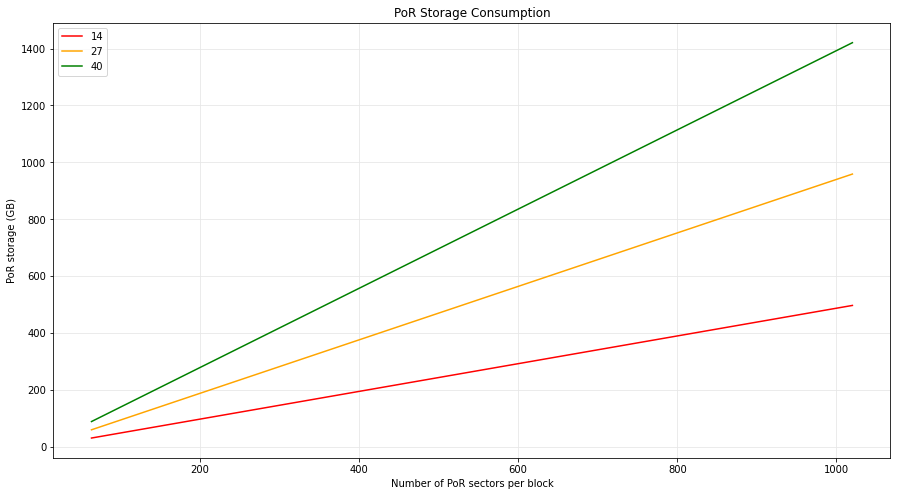

<Figure size 1080x576 with 0 Axes>

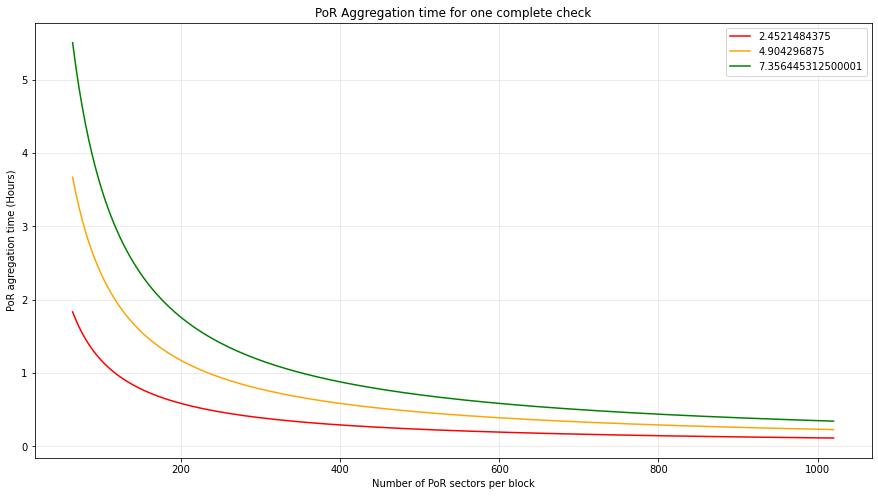

In [2]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]


#@markdown #Network parameters. 
#@markdown These parameters give the characteristic of the network and we (Codex) have no control over them.

#@markdown Number of nodes in the network
NetworkSize = 15400 #@param {type:"slider", min:100, max:20000, step:100}
#@markdown Average storage size per node (in GB)
NodeCapacity = 1200 #@param {type:"slider", min:100, max:10000, step:100}
#@markdown Number of files in the system
NumberOfFiles = 1206000 #@param {type:"slider", min:1000, max:10000000, step:1000}
#@markdown File size (in KB)
FileSize = 10000000 #@param {type:"slider", min:100, max:10000000, step:100}
#@markdown Overall network MTBF (in hours)
MTBF = 1  #@param {type:"slider", min:1, max:100, step:1}
#@markdown Percentage of data a malicious node discards or refuses/avoids to store
CheatRatio = 5 #@param {type:"slider", min:5, max:95, step:5}
#@markdown Predefined Scenario (Set to 1 to overwrite the above parameters with the values from the Storj network)
Scenario = 0  #@param {type:"slider", min:0, max:1, step:1}

#@markdown ----------------------------------------------------
#@markdown ----------------------------------------------------
#@markdown ----------------------------------------------------


#@markdown #Codex parameters
#@markdown The Codex team can tune the following parametersto potimize the system

#@markdown Erasure Coding parameter K
ECK = 60 #@param {type:"slider", min:1, max:100, step:1}
#@markdown Erasure Coding parameter M
ECM = 40 #@param {type:"slider", min:1, max:100, step:1}
#@markdown Lazy repair parameter L (start repair after L erasures)
ECL = 20 #@param {type:"slider", min:1, max:100, step:1}
#@markdown Number of PoR sectors (PoR Parameter S)
PoRS = 1000 #@param {type:"slider", min:10, max:1000, step:10}
#@markdown PoR block agregation cost (in miliseconds)
AgregationCost = 1 #@param {type:"slider", min:1, max:100, step:1}
#@markdown Durability guarantee (three 9s (99.9%) to nine 9s (99.9999999%))
Durability = 9 #@param {type:"slider", min:3, max:9, step:3}


# #@markdown Number of EC blocks to verify among K+M nodes
#HorizontalVerification = 40 #@param {type:"slider", min:1, max:100, step:1}
##@markdown Percentage of PoR blocks to verify inside an EC block
#VerticalVerification = 0.2  #@param {type:"slider", min:0.1, max:1, step:0.1}


if Scenario == 1:
  print("\n***This is the Storj scenario***\n")
  NetworkSize = 15400
  NodeCapacity = 1200
  NumberOfFiles = 1200000
  FileSize = 10000000

print("\n *** Network Parameters *** \n")
print("The network has %d nodes" % NetworkSize)
print("The average node capacity is %d GBs" % NodeCapacity)
print("The network has %d files" % NumberOfFiles)
print("The average file size in the network is %d MBs" % (FileSize/1024))
print("The estimated mean time between failures of the network is %d hours" % MTBF)
print("Malicious nodes cheat the system by NOT storing %d%% of the data they should store" % CheatRatio)


print("\n *** Codex Parameters *** \n")
print("The erasure coding parameter K is %d" % ECK)
print("The erasure coding parameter M is %d" % ECM)
print("The lazy repair parameter L is %d" % ECL)
print("The Proof of Retrievability number of sectors per block is %d" % PoRS)
print("The PoR agregation cost is %d ms per PoR block" % AgregationCost)
print("Durability in number of nines: %d" % Durability)

ECblockSize = FileSize/ECK
PoRblockSize = 31*PoRS/1024
TotalECBlocks = NumberOfFiles*(ECK+ECM)
ECBlocksPerNode = TotalECBlocks/NetworkSize
NbPoRinEC = ECblockSize/PoRblockSize
TotalUsedCapacityTB = int(NumberOfFiles*FileSize)/int(1024*1024*1024)
TotalNetworkCapacity = NetworkSize*NodeCapacity/1024

print("\n *** Dataset and block structures *** \n")
print("There are %d files of size %d KB (%2.1f MB)" % (NumberOfFiles, FileSize, FileSize/1024))
print("The total storage used in the network is %2.1f TB and there is %2.1f TB of available storage for a total of %2.1f TB" % (TotalUsedCapacityTB, TotalNetworkCapacity-TotalUsedCapacityTB, TotalNetworkCapacity))
print("There will be %d EC blocks of size %2.1f MBs per file" % (ECK+ECM, ECblockSize/1024))
print("There is a total of %d EC blocks in the network" % TotalECBlocks)
print("There is an average of %2.1f EC blocks per node (assuming an homogeneous distribution)" % ECBlocksPerNode)
print("Each EC block has %2.1f PoR blocks of size %2.1f KB" % (NbPoRinEC, PoRblockSize))


print("\n *** Durability guarantees and verification frequency *** \n")
GuaranteeDurability = {3:99.90, 6: 99.99990, 9: 99.99999990}
ExpectedGuarantee = GuaranteeDurability[Durability]



hx = []
HorizontalProb = []
HorizontalResults = {3:0, 6:0, 9:0}
for NbOfHVerif in range(ECK):
  prob = (1-(((ECK-1)/100)**NbOfHVerif))*100
  hx.append(NbOfHVerif)
  HorizontalProb.append(prob)
  if prob > GuaranteeDurability[3] and HorizontalResults[3] == 0:
    HorizontalResults[3] = NbOfHVerif
  if prob > GuaranteeDurability[6] and HorizontalResults[6] == 0:
    HorizontalResults[6] = NbOfHVerif
  if prob > GuaranteeDurability[9] and HorizontalResults[9] == 0:
    HorizontalResults[9] = NbOfHVerif

HorizontalVerification = HorizontalResults[9]    
print("We need %d horizontal verifications to have %12.12f%% guarantee" % (HorizontalResults[3], GuaranteeDurability[3]))
print("We need %d horizontal verifications to have %12.12f%% guarantee" % (HorizontalResults[6], GuaranteeDurability[6]))
print("We need %d horizontal verifications to have %12.12f%% guarantee" % (HorizontalResults[9], GuaranteeDurability[9]))
 
VerticalProb = []
VerticalResults = {3:0, 6:0, 9:0}
for NbOfVVerif in range(1, int(NbPoRinEC)):
  prob = (1-((1-(CheatRatio/100))**NbOfVVerif))*100
  if prob > GuaranteeDurability[3] and VerticalResults[3] == 0:
    VerticalResults[3] = NbOfVVerif*100/NbPoRinEC
  if prob > GuaranteeDurability[6] and VerticalResults[6] == 0:
    VerticalResults[6] = NbOfVVerif*100/NbPoRinEC
  if prob > GuaranteeDurability[9] and VerticalResults[9] == 0:
    VerticalResults[9] = NbOfVVerif*100/NbPoRinEC
  VerticalProb.append(prob)

print("For Cheat Ratio : %d" % CheatRatio)
VerticalVerification = VerticalResults[9]
print("We need %2.1f%% vertical verifications to have %12.12f%% guarantee" % (VerticalResults[3], GuaranteeDurability[3]))
print("We need %2.1f%% vertical verifications to have %12.12f%% guarantee" % (VerticalResults[6], GuaranteeDurability[6]))
print("We need %2.1f%% vertical verifications to have %12.12f%% guarantee" % (VerticalResults[9], GuaranteeDurability[9]))


print("\nGuarantee of data durability is %9.9f" % ExpectedGuarantee)
print("The PoR horizontal verification factor is %2.1f" % HorizontalVerification)
print("The PoR vertical verification factor is %2.1f%%" % VerticalVerification)


TotalPoRStorageMB = NumberOfFiles*HorizontalVerification*PoRblockSize/1024
NodeAgregationTime = NbPoRinEC*VerticalVerification/100*ECBlocksPerNode*(HorizontalVerification/(ECK+ECM))*AgregationCost/(1000*60)
PoRPerYear = 365*24/(ECL*MTBF)


print("\n *** PoR Storage and Time Requirements *** \n")
print("The total storage required for PoR proofs is %2.1f MB to check a total of %2.1fTB of data each round (%2.6f%%)" % (TotalPoRStorageMB, TotalUsedCapacityTB, TotalPoRStorageMB/TotalUsedCapacityTB/1024/1024*100))
print("To verify %d EC blocks and %2.1f%% PoR blocks per file in the system:" % (HorizontalVerification, VerticalVerification))
print("Each node will spend %2.1f minutes (%2.1f hours) agregating PoR proofs" % (NodeAgregationTime, NodeAgregationTime/60))
print("It will take the system %d hours (%2.1f days) to accidentally lose M nodes" % (MTBF*ECM, MTBF*ECM/24))
print("Lazy repair should be triggered after %d hours (%2.1f days)" % (MTBF*ECL, MTBF*ECL/24))
print("Assuming PoR verifications are done once per lazy repair round, PoR verification takes %2.1f%% of the time" % ((NodeAgregationTime*100)/(MTBF*ECL*60)))
print("There are %2.1f PoR verification rounds in a year accumulating %2.1f GB of storage" % (PoRPerYear, PoRPerYear*TotalPoRStorageMB/1024))

color = ["red", "orange", "green", "blue"]
storVector = []
aggVector = []
HorVer = [HorizontalResults[3], HorizontalResults[6], HorizontalResults[9]]
VerVec = [VerticalResults[3], VerticalResults[6], VerticalResults[9]]
for i in range(len(HorizontalResults)):
  vx = range(64,1024,4)
  agregationVector = []
  storageVector  = []
  for PoRS in range(64,1024,4):
    PoRblockSize = 31*PoRS/1024
    NbPoRinEC = ECblockSize/PoRblockSize
    TotalPoRStorageMB = NumberOfFiles*HorVer[i]*PoRblockSize/(1024*1024)
    NodeAgregationTime = NbPoRinEC*VerVec[i]/100*ECBlocksPerNode*(HorizontalVerification/(ECK+ECM))*AgregationCost/(1000*60*60)
    PoRPerYear = 365*24/(ECL*MTBF)
    storageVector.append(TotalPoRStorageMB)
    agregationVector.append(NodeAgregationTime)
  storVector.append(storageVector)
  aggVector.append(agregationVector)
 

fig, ax = plt.subplots()
plt.grid(axis='x', color='0.9')
plt.grid(axis='y', color='0.9')
plt.title("PoR Storage Consumption")
plt.xlabel("Number of PoR sectors per block")
plt.ylabel("PoR storage (GB)")
for i in range(len(HorizontalResults)):
  ax.plot(vx, storVector[i], label = HorVer[i], color = color[i])
#plt.yscale('log')
ax.legend()
plt.show()
plt.clf()

fig, ax = plt.subplots()
plt.grid(axis='x', color='0.9')
plt.grid(axis='y', color='0.9')
plt.title("PoR Aggregation time for one complete check")
plt.xlabel("Number of PoR sectors per block")
plt.ylabel("PoR agregation time (Hours)")
for i in range(len(HorizontalResults)):
  ax.plot(vx, aggVector[i], label = VerVec[i], color = color[i])
ax.legend()
plt.show()
#print(storageVector)
